In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import word_tokenize,sent_tokenize
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import re
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
query="(#layoffs, #elonmusk) until:2022-11-24 since:2010-01-01"
tweets = []
limit = 1000
for tweet in sntwitter.TwitterHashtagScraper(query).get_items():
        
    #print(vars(tweet))
    #break
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.url, tweet.user.username, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount, tweet.replyCount])
        
df = pd.DataFrame(tweets, columns=['Date', 'URL', 'Username', 'Location', 'Tweet', 'LikeCount', 'Retweet Count', 'Reply Count'])
print(df)
 
df.to_csv('tweetsfin.csv')

                         Date  \
0   2022-11-23 13:56:00+00:00   
1   2022-11-23 12:13:54+00:00   
2   2022-11-23 12:04:37+00:00   
3   2022-11-23 06:48:22+00:00   
4   2022-11-23 06:15:41+00:00   
..                        ...   
703 2017-11-02 18:02:26+00:00   
704 2017-11-02 18:02:26+00:00   
705 2017-11-02 17:56:10+00:00   
706 2017-11-02 17:56:08+00:00   
707 2017-11-02 17:56:08+00:00   

                                                   URL         Username  \
0    https://twitter.com/MoneycontrolH/status/15954...    MoneycontrolH   
1    https://twitter.com/jasmin_kumar_/status/15953...    jasmin_kumar_   
2    https://twitter.com/Sumit44658569/status/15953...    Sumit44658569   
3    https://twitter.com/naye_news/status/159530825...        naye_news   
4    https://twitter.com/techportalntw/status/15953...    techportalntw   
..                                                 ...              ...   
703  https://twitter.com/Autotestdrivers/status/926...  Autotestdrivers   
704

In [3]:
df1 = pd.read_csv('tweetsfin.csv')
df1

,Unnamed: 0,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,#Layoffs || Meta-Twitter Layoffs: सिर्फ लोअर ल...,0,0,0
1,1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,NaN,Since when has government started to pull up p...,3,2,0
2,2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai","Maybe @elonmusk should buy LinkedIn, it's beco...",2,1,1
3,3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,NaN,Nearly 75% Twitter Employees Layoffs In A Mont...,0,0,0
4,4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,In an all-hands meeting with @Twitter employee...,2,0,0
...,...,...,...,...,...,...,...,...,...
703,703,2017-11-02 18:02:26+00:00,https://twitter.com/Autotestdrivers/status/926...,Autotestdrivers,Mesa AZ,'Shame!': Elon Musk scolds reporters who cover...,0,0,0
704,704,2017-11-02 18:02:26+00:00,https://twitter.com/TalkingScars/status/926147...,TalkingScars,NaN,'Shame!': Elon Musk scolds reporters who cover...,0,0,0
705,705,2017-11-02 17:56:10+00:00,https://twitter.com/dealertucsonaz/status/9261...,dealertucsonaz,"Tuscon, AZ",#dealertucsonAZ #elonmusk #layoffs #official '...,0,0,0
706,706,2017-11-02 17:56:08+00:00,https://twitter.com/mobileglasstx/status/92614...,mobileglasstx,"Dallas, TX",#elonmusk #layoffs 'Shame!': Elon Musk scolds ...,0,0,0


In [4]:
copy1 = df.copy(deep=True)

### Pre-Processing

In [5]:
#Lowecase
copy1['Tweet'] = copy1['Tweet'].apply(lambda x: str(x).lower())
copy1.head()

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,#layoffs || meta-twitter layoffs: सिर्फ लोअर ल...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai","maybe @elonmusk should buy linkedin, it's beco...",2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75% twitter employees layoffs in a mont...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an all-hands meeting with @twitter employee...,2,0,0


In [6]:
#Remove punctuations
copy1['Tweet']=copy1['Tweet'].apply(lambda x: x.translate({ord(c):'' for c in "[à¤¯à¤¾à¤².!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]"}))
copy1.head()

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,layoffs metatwitter layoffs सिर्फ लोअर लेवल क...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai",maybe elonmusk should buy linkedin it's becomi...,2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75 twitter employees layoffs in a month...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an allhands meeting with twitter employees ...,2,0,0


In [7]:
#Pre-Processing - Removing emoticons and chinese words and also stripping extra spaces,newline character.
copy1['Tweet']=copy1['Tweet'].apply(lambda x: x.strip())
import re
def remove_emoji(row):
    emoji = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U00002500-\U00002BEF"  # chinese char

                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', row)
copy1['Tweet']=copy1['Tweet'].apply(remove_emoji)
copy1

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,layoffs metatwitter layoffs सिर्फ लोअर लेवल क...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai",maybe elonmusk should buy linkedin it's becomi...,2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75 twitter employees layoffs in a month...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an allhands meeting with twitter employees ...,2,0,0
...,...,...,...,...,...,...,...,...
703,2017-11-02 18:02:26+00:00,https://twitter.com/Autotestdrivers/status/926...,Autotestdrivers,Mesa AZ,'shame' elon musk scolds reporters who covered...,0,0,0
704,2017-11-02 18:02:26+00:00,https://twitter.com/TalkingScars/status/926147...,TalkingScars,,'shame' elon musk scolds reporters who covered...,0,0,0
705,2017-11-02 17:56:10+00:00,https://twitter.com/dealertucsonaz/status/9261...,dealertucsonaz,"Tuscon, AZ",dealertucsonaz elonmusk layoffs official 'sham...,0,0,0
706,2017-11-02 17:56:08+00:00,https://twitter.com/mobileglasstx/status/92614...,mobileglasstx,"Dallas, TX",elonmusk layoffs 'shame' elon musk scolds repo...,0,0,0


In [8]:
#Remove Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(row):
    row = row.split()
    row_new = " ".join([i for i in row if i not in stop_words])
    return row_new
def remove_freq_words(row):
    freq  = ['thanks','thnkx','thx','hey','hello','please','hi','hola','sorry','i','you','u','apologies']
    row = row.split()
    row_new = " ".join([i for i in row if i not in freq])
    return row_new

In [9]:
copy1['Tweet'].apply(remove_stopwords)

0      layoffs metatwitter layoffs सिर्फ लोअर लेवल के...
1      since government started pull private companie...
2      maybe elonmusk buy linkedin becoming new socia...
3      nearly 75 twitter employees layoffs month elon...
4      allhands meeting twitter employees elonmusk in...
                             ...                        
703    'shame' elon musk scolds reporters covered tes...
704    'shame' elon musk scolds reporters covered tes...
705    dealertucsonaz elonmusk layoffs official 'sham...
706    elonmusk layoffs 'shame' elon musk scolds repo...
707    elonmusk layoffs 'shame' elon musk scolds repo...
Name: Tweet, Length: 708, dtype: object

In [10]:
#Remove URL's
import re
def remove_urls(row):
    url_pattern = re.compile(r'http?://\S+|ww\.\S+|^\d+\s|\s\d+\s|\s\d+$')
    return url_pattern.sub(r'', row)

In [11]:
copy1['Tweet'].apply(remove_urls)
copy1

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count
0,2022-11-23 13:56:00+00:00,https://twitter.com/MoneycontrolH/status/15954...,MoneycontrolH,Noida,layoffs metatwitter layoffs सिर्फ लोअर लेवल क...,0,0,0
1,2022-11-23 12:13:54+00:00,https://twitter.com/jasmin_kumar_/status/15953...,jasmin_kumar_,,since when has government started to pull up p...,3,2,0
2,2022-11-23 12:04:37+00:00,https://twitter.com/Sumit44658569/status/15953...,Sumit44658569,"Nalasopara, Mumbai",maybe elonmusk should buy linkedin it's becomi...,2,1,1
3,2022-11-23 06:48:22+00:00,https://twitter.com/naye_news/status/159530825...,naye_news,,nearly 75 twitter employees layoffs in a month...,0,0,0
4,2022-11-23 06:15:41+00:00,https://twitter.com/techportalntw/status/15953...,techportalntw,Global,in an allhands meeting with twitter employees ...,2,0,0
...,...,...,...,...,...,...,...,...
703,2017-11-02 18:02:26+00:00,https://twitter.com/Autotestdrivers/status/926...,Autotestdrivers,Mesa AZ,'shame' elon musk scolds reporters who covered...,0,0,0
704,2017-11-02 18:02:26+00:00,https://twitter.com/TalkingScars/status/926147...,TalkingScars,,'shame' elon musk scolds reporters who covered...,0,0,0
705,2017-11-02 17:56:10+00:00,https://twitter.com/dealertucsonaz/status/9261...,dealertucsonaz,"Tuscon, AZ",dealertucsonaz elonmusk layoffs official 'sham...,0,0,0
706,2017-11-02 17:56:08+00:00,https://twitter.com/mobileglasstx/status/92614...,mobileglasstx,"Dallas, TX",elonmusk layoffs 'shame' elon musk scolds repo...,0,0,0


In [12]:
#Removing Non-English Words
import enchant
def check_english(row):
    d = enchant.Dict("en_US")
    new= []
    new = [x for x in row if d.check(x)==True]
    return new

In [13]:
copy1['Tweet'].apply(check_english)

0      [l, a, y, o, f, f, s,  ,  , m, e, t, a, t, w, ...
1      [s, i, n, c, e,  , w, h, e, n,  , h, a, s,  , ...
2      [m, a, y, b, e,  , e, l, o, n, m, u, s, k,  , ...
3      [n, e, a, r, l, y,  , 7, 5,  , t, w, i, t, t, ...
4      [i, n,  , a, n,  , a, l, l, h, a, n, d, s,  , ...
                             ...                        
703    [s, h, a, m, e,  , e, l, o, n,  , m, u, s, k, ...
704    [s, h, a, m, e,  , e, l, o, n,  , m, u, s, k, ...
705    [d, e, a, l, e, r, t, u, c, s, o, n, a, z,  , ...
706    [e, l, o, n, m, u, s, k,  , l, a, y, o, f, f, ...
707    [e, l, o, n, m, u, s, k,  , l, a, y, o, f, f, ...
Name: Tweet, Length: 708, dtype: object

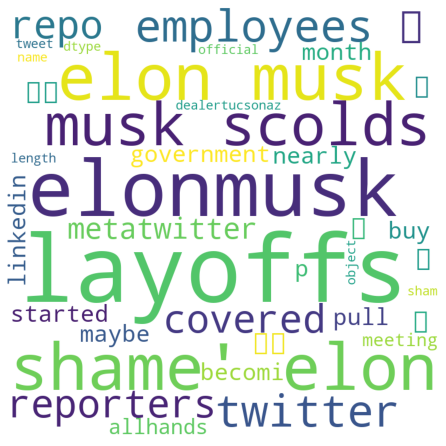

In [14]:
#Generating WordCloud
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file

# typecaste each val to string
val = str(copy1['Tweet'])

# split the value
tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
stopwords = stopwords,
min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Sentiment Analysis

In [15]:
sent_analysis = copy1
sentiment_analyzer = SentimentIntensityAnalyzer()
sent_analysis['compound'] = [sentiment_analyzer.polarity_scores(x)['compound'] for x in sent_analysis['Tweet']]
sent_analysis['pos'] = [sentiment_analyzer.polarity_scores(x)['pos'] for x in sent_analysis['Tweet']]
sent_analysis['neg'] = [sentiment_analyzer.polarity_scores(x)['neg'] for x in sent_analysis['Tweet']]
sent_analysis['neu'] = [sentiment_analyzer.polarity_scores(x)['neu'] for x in sent_analysis['Tweet']]
sent_analysis.sample(50)

,Date,URL,Username,Location,Tweet,LikeCount,Retweet Count,Reply Count,compound,pos,neg,neu
408,2022-11-04 13:39:34+00:00,https://twitter.com/The_SparrowNews/status/158...,The_SparrowNews,"Ahmedabad, Gujarat",twitter lays off entire marketing and communic...,1,0,0,0.0000,0.000,0.000,1.000
543,2022-10-28 10:20:50+00:00,https://twitter.com/rishabh__97/status/1585939...,rishabh__97,,elon musk fires vijaya gadde head of legal aff...,1,0,0,-0.7717,0.047,0.227,0.726
369,2022-11-04 20:40:46+00:00,https://twitter.com/LayoffsTracker/status/1588...,LayoffsTracker,,twitter layoffs\n50 workforce\n3750 employees\...,9,6,1,0.0000,0.000,0.000,1.000
28,2022-11-22 04:20:11+00:00,https://twitter.com/bsindia/status/15949085761...,bsindia,India,twitter is done with layoffs and ready to hire...,16,2,1,0.3612,0.122,0.000,0.878
503,2022-11-01 07:29:08+00:00,https://twitter.com/atiqurreh/status/158734598...,atiqurreh,"Multan, Punjab, Pakistan",twitter is bracing for layoffs and big changes...,0,1,0,0.0000,0.000,0.000,1.000
392,2022-11-04 16:16:11+00:00,https://twitter.com/PragatiAwasthi8/status/158...,PragatiAwasthi8,"Noida, India",he's a mad personelonmusk elonmuskbuytwitter l...,0,0,0,-0.4939,0.000,0.348,0.652
411,2022-11-04 13:10:46+00:00,https://twitter.com/SZnewsRo/status/1588519123...,SZnewsRo,"Bucharest, Romania",employees braced for widespread layoffs at twi...,0,0,0,0.0000,0.000,0.000,1.000
180,2022-11-11 02:25:11+00:00,https://twitter.com/_pragmatic_dev/status/1590...,_pragmatic_dev,,elon musk linkedin dp be like \n\nmusktwitter ...,2,0,0,-0.0772,0.163,0.183,0.654
276,2022-11-07 10:23:40+00:00,https://twitter.com/BizzBuzzNews/status/158956...,BizzBuzzNews,,twitter continues massive layoff s as musk jus...,2,0,0,-0.3818,0.000,0.126,0.874
610,2022-06-30 08:00:19+00:00,https://twitter.com/AarnaPrakash/status/154241...,AarnaPrakash,,tesla has laid off around 200 workers on its a...,1,1,1,0.0000,0.000,0.000,1.000


### Topic Modelling

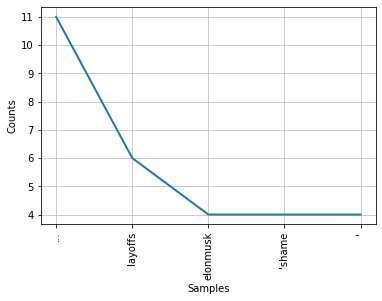

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
import re
from nltk.util import ngrams

def generate_n_grams(formatted_text,n):
    formatted_text = formatted_text.lower()
    n_grams=ngrams(nltk.word_tokenize(formatted_text),n)
    return [' '.join(grams) for grams in n_grams]

n_grams=generate_n_grams(val,1)
nfreq_dist = nltk.FreqDist(n_grams)
nfreq_dist.plot(5,cumulative=False)

In [17]:
#Sentence Scores
sentences = []
for sent in copy1['Tweet']:
    if sent != '':
        sentences.append(sent)
str1 = '. '.join(sentences)
str1
frequency = nfreq_dist
from nltk.tokenize import sent_tokenize
sentences=sent_tokenize(str1)
max_frequency = max(frequency.values())
for word in frequency.keys():
    frequency[word] = frequency[word]/max_frequency
frequency
sentence_scores={}
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in frequency.keys():
            if len(sentence.split(' ')) < 30:
                if sentence not in sentence_scores.keys():
                    sentence_scores[sentence] = frequency[word]
                else:
                    sentence_scores[sentence] += frequency[word]
sentence_scores

{'layoffs  metatwitter layoffs सिर्फ लोअर लेवल के लोग क्यों निशाने पर\nsonalmk twitter elonmusk meta \n\nitlayoffs twitterlayoffs meta metalayoffs unemployment markzuckerberg elonmusk workforce moneycontrol \n\nhttpstcot0s2vxuh9h.': 2.3636363636363633,
 "nearly 75 twitter employees layoffs in a month will elon musk's new policy be able to assure the employees  httpstcol8gip0zeis nayenews twitter elonmusk layoffs socialnetwork.": 3.636363636363636,
 'do not quit your job let your employer fire you fiddle while rome burns\nhttpstcofbqnkzkjzm\n\nresignations twitterlayoffs layoffs job jobcuts unemployment unemployed joblosses humanresources toxicworkplace lifeisgood  employment employeeexperience elonmusk.': 0.9090909090909091,
 'காசு பணம் துட்டு பணிநீக்கம் முடிந்தது இனி பணி நியமனம் தான் எலான் httpstcotkouhlexmh   twitter elonmusk layoffs httpstcoxg646qjdac.': 1.0909090909090908,
 'if you are interested why twitter is still running despite all the lay offs then read this great article htt

In [19]:
import gensim
from gensim.utils import simple_preprocess
import nltk
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import gensim.corpora as corpora
from pprint import pprint

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = sentences
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)


id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

doc_lda = lda_model[corpus]
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\hrish\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.031043  0.077897       1        1  37.494613
4     -0.047017  0.073864       2        1  16.372833
6      0.103761  0.045244       3        1   8.635423
7     -0.029116  0.009054       4        1   7.830384
1     -0.040687 -0.004233       5        1   7.400753
9     -0.038092 -0.046038       6        1   5.220396
2     -0.012344 -0.041028       7        1   5.052041
3     -0.001035 -0.033645       8        1   4.471835
8      0.101287 -0.013745       9        1   4.302636
5     -0.005715 -0.067370      10        1   3.219087, topic_info=          Term        Freq       Total Category  logprob  loglift
3      layoffs  668.000000  668.000000  Default  30.0000  30.0000
0     elonmusk  611.000000  611.000000  Default  29.0000  29.0000
10     twitter  625.000000  625.000000  Default  28.0000  28.0000
1006     covid   37.000000   37.000000  Default  27.0000  27.0000
54        elon  167.000000  167.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
550   takeover    0.962792   17.272904  Topic10  -6.0671   0.5490
73        news    1.075483   39.581016  Topic10  -5.9564  -0.1695
536        मसक    0.780987   10.390094  Topic10  -6.2764   0.8480
169      tesla    0.921680  105.836165  Topic10  -6.1108  -1.3074
755       mass    0.774100   38.934909  Topic10  -6.2853  -0.4819

[708 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1728      5  0.699484  abandoned
3908      7  0.519067   abruptly
197       1  0.388706  according
197       2  0.097176  according
197       4  0.097176  according
...     ...       ...        ...
914       3  0.350338        റററ
914       4  0.350338        റററ
1927      4  0.727360        𝐓𝐇𝐄
3009      6  0.751312         𝗢𝗥
3010      6  0.751370       𝗪𝗘𝗘𝗞

[1193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 7, 8, 2, 10, 3, 4, 9, 6])